# Practicing NumPy - Assignment 01

##### Name : Elvis Aptanisa - Exchange Student
##### Course : Introduction to Deep Learning

## Part C: Neural Network Implementation from Scratch

----------
#### Goal: Train a simple two-layer neural network (3-3-1) using NumPy
#### Input: 3 features
#### Hidden layer: 3 neurons with ReLU
#### Output: 1 neuron with Sigmoid
#### Loss function: Mean Squared Error (MSE)
#### Dataset: All 5 samples are used for training
---------


In [10]:
import numpy as np
import matplotlib.pyplot as plt

##### C.1 - Dataset

In [11]:
X = np.array([
    [20, 3, 4],
    [15, 5, 3],
    [30, 2, 2],
    [25, 4, 1],
    [35, 2, 3]
])  # shape: (5, 3)

y = np.array([[18], [20], [22], [25], [30]])  # shape: (5, 1)

# Normalize target to fit sigmoid range (0-1)
y_norm = y / 50.0

##### C.2 - Hyperparameters

In [12]:
input_size  = 3
hidden_size = 3
output_size = 1

learning_rate = 0.02   # can try 0.01 - 0.05
epochs = 15000

np.random.seed(42)

##### C.3 - Initialize Weights & Biases

In [13]:
W1 = np.random.randn(hidden_size, input_size) * 0.01
b1 = np.zeros((hidden_size, 1))

W2 = np.random.randn(output_size, hidden_size) * 0.01
b2 = np.zeros((output_size, 1))

##### C.4 - Activation Functions

In [14]:
def relu(z):
    return np.maximum(0, z)

def relu_deriv(z):
    return (z > 0).astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(a):
    return a * (1 - a)

##### C.5 - Training Loop

In [15]:
losses = []

for epoch in range(epochs):
    # Forward pass
    Z1 = W1 @ X.T + b1           # (3,5)
    A1 = relu(Z1)
    Z2 = W2 @ A1 + b2            # (1,5)
    A2 = sigmoid(Z2)

    # Loss (MSE)
    loss = np.mean((A2 - y_norm.T)**2)
    losses.append(loss)

    # Backward pass
    m = X.shape[0]  # number of samples = 5
    dA2 = 2 * (A2 - y_norm.T) / m
    dZ2 = dA2 * sigmoid_deriv(A2)

    dW2 = dZ2 @ A1.T
    db2 = np.sum(dZ2, axis=1, keepdims=True)

    dA1 = W2.T @ dZ2
    dZ1 = dA1 * relu_deriv(Z1)

    dW1 = dZ1 @ X
    db1 = np.sum(dZ1, axis=1, keepdims=True)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    if epoch % 2000 == 0:
        print(f"Epoch {epoch:5d} | Loss: {loss:.6f}")

Epoch     0 | Loss: 0.008612
Epoch  2000 | Loss: 0.005517
Epoch  4000 | Loss: 0.002958
Epoch  6000 | Loss: 0.002521
Epoch  8000 | Loss: 0.002426
Epoch 10000 | Loss: 0.002352
Epoch 12000 | Loss: 0.002281
Epoch 14000 | Loss: 0.002213


##### C.6 - Plot Training Loss

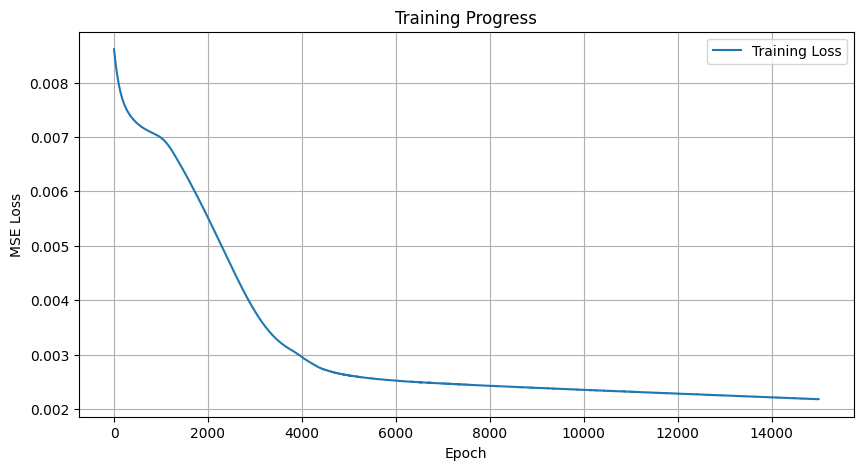

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Progress')
plt.legend()
plt.grid(True)
plt.show()

##### C.7 - Final Predictions

In [17]:
Z1_pred = W1 @ X.T + b1
A1_pred = relu(Z1_pred)
Z2_pred = W2 @ A1_pred + b2
A2_pred = sigmoid(Z2_pred)

# Convert back to original scale
predictions = A2_pred.T * 50

print("\nFinal Predictions vs Actual:")
print("Input\t\tPredicted\tActual")
for i in range(len(y)):
    print(f"{X[i]}\t{predictions[i][0]:.2f}\t\t{y[i][0]}")


Final Predictions vs Actual:
Input		Predicted	Actual
[20  3  4]	19.08		18
[15  5  3]	19.23		20
[30  2  2]	25.90		22
[25  4  1]	24.31		25
[35  2  3]	26.87		30


##### C.8 - Final Parameters

In [18]:
print("\nFinal Learned Parameters:")
print("W1 =\n", np.round(W1, 6))
print("\nb1 =\n", np.round(b1, 6))
print("\nW2 =\n", np.round(W2, 6))
print("\nb2 =\n", np.round(b2, 6))


Final Learned Parameters:
W1 =
 [[ 0.064868 -0.152913 -0.184794]
 [ 0.072346  0.081925 -0.158623]
 [-0.012487 -0.020364  0.153579]]

b1 =
 [[-0.09952 ]
 [-0.05822 ]
 [ 0.014923]]

W2 =
 [[ 0.267129  0.200671 -0.154249]]

b2 =
 [[-0.634158]]
